<a href="https://colab.research.google.com/github/Ilyass-Dahaoui/Artificial-intelligence-for-energy/blob/main/TP2_Regression_Models_and_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [7]:
data=pd.read_csv("/content/dataTP.txt",delimiter='\t')
data.head()

,Hour,PAC,Tm,Tamb,TOA,GHI
0,10,3802.507576,42.347879,14.50,6181.305,4278.672
1,11,3059.995455,55.044545,15.98,7261.285,5195.536
2,12,5104.446970,67.297576,17.46,7637.228,5525.204
3,13,5095.312121,77.016667,18.24,7283.514,5236.036
4,14,4968.204545,80.223030,18.45,6224.230,4346.761


In [8]:
data.shape

(9394, 6)

In [9]:
data.describe()

,Hour,PAC,Tm,Tamb,TOA,GHI
count,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000
mean,11.844049,2728.996212,56.293230,19.577275,6264.484603,3773.160933
std,3.974937,2115.746883,25.588611,4.828761,4035.607486,3006.480785
min,4.000000,0.000000,0.000000,7.160000,0.000000,0.000000
25%,8.000000,442.413345,44.344811,15.940000,2622.576000,969.443750
50%,12.000000,2791.191526,62.983697,19.270000,6712.258000,3354.455000
75%,15.000000,4861.013259,77.606250,23.140000,9706.918750,6209.692000
max,20.000000,6124.527273,87.066667,37.800000,12939.077000,10476.982000


Heure (Hour) :

La plupart des observations semblent être réparties entre 8 et 15 heures.
La moyenne est proche de 12 heures, ce qui est cohérent avec cette concentration.
Puissance AC (PAC) :

La puissance AC moyenne semble être d'environ 2729, avec une grande variabilité (écart-type élevé).
La puissance maximale est de 6124, indiquant des valeurs relativement élevées.
Tm :

La température moyenne semble être d'environ 56, avec une variabilité considérable.
La plage des températures varie de 0 à 87, avec une médiane à 62.98.
Température ambiante (Tamb) :

La température ambiante moyenne est d'environ 19.58, avec une faible variabilité.
La température ambiante minimale est de 7.16, indiquant un écart important.
TOA (Top of Atmosphere) :

La moyenne de la radiation solaire TOA est d'environ 6264, avec une grande variabilité.
Les valeurs vont de 0 à 12939, montrant une large gamme de radiations solaires.
GHI (Global Horizontal Irradiance) :

La moyenne de l'irradiance horizontale globale est d'environ 3773, avec une variabilité considérable.
La valeur maximale est de 10476, indiquant des niveaux élevés d'irradiance.
En résumé, les données semblent être assez variables, avec des gammes étendues pour plusieurs variables. L'heure semble suivre une distribution normale autour de midi, tandis que d'autres variables présentent une variabilité significative avec des valeurs extrêmes possibles. Ces observations peuvent être utiles pour comprendre la nature et la portée des données, ainsi que pour identifier des tendances ou des points saillants.







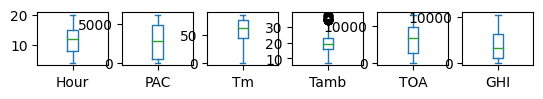

<Figure size 600x400 with 0 Axes>

In [10]:
data.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.figure(figsize=(6,4))
plt.show()

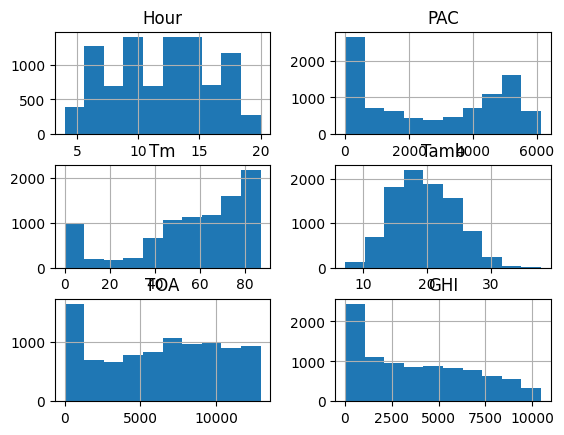

In [11]:
data.hist()
plt.show()

interpretation: on remarque que les données ne suivent pas une distribution normale avec l'existence de quelque valeurs abérrantes

Donc il faut normaliser nos données

In [12]:
y=data.PAC
x=data.drop('PAC',axis=1)

In [37]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=2348,random_state=100)

In [15]:
#centrage-réduction des variables
scaler = MinMaxScaler()
XTrainStd = scaler.fit_transform(x_train)
#comparaison des moyennes, avant ...
print(np.mean(x_train,axis=0))

Hour      11.884048
Tm        56.435012
Tamb      19.552282
TOA     6283.139553
GHI     3789.532906
dtype: float64


In [31]:
XTestStd=scaler.fit_transform(x_test)

In [16]:
print(np.mean(XTrainStd,axis=0))

[0.49275298 0.64818161 0.40444785 0.48559411 0.36170081]


on voit bien que après normalisation on a eu une distribution centré en 0

# REGRESSION POLYNOMIALE

In [17]:
#entrainement du modèle
polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(XTrainStd)
model = LinearRegression()

In [19]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_train_poly)
r2 = r2_score(y_train, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9339743419030814


In [21]:
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(XTrainStd)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_train_poly)
r2 = r2_score(y_train, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9167056662416285


In [22]:
polynomial_features= PolynomialFeatures(degree=4)
X_train_poly = polynomial_features.fit_transform(XTrainStd)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_train_poly)
r2 = r2_score(y_train, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.943472968871086


In [23]:
polynomial_features= PolynomialFeatures(degree=9)
X_train_poly = polynomial_features.fit_transform(XTrainStd)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_train_poly)
r2 = r2_score(y_train, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9734894315191042


In [24]:
polynomial_features= PolynomialFeatures(degree=10)
X_train_poly = polynomial_features.fit_transform(XTrainStd)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_train_poly)
r2 = r2_score(y_train, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9811472900601104


donc après avoir entrainé le modèle de regression polynomiale on constate que l'augmentation de degré du polynome augmente la performance du modèle



# Support Vector Regression (SVR)

In [25]:
model = SVR(kernel=" ... ")

In [ ]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    for degree in [2, 3, 4]:
        for gamma in ['auto', 0.1, 1]:
            for C in [0.1, 1, 10]:
                for coef0 in [0.0, 1.0, 2.0]:
                    model = SVR(kernel=kernel, degree=degree, gamma=gamma, C=C, coef0=coef0)
                    model.fit(x_train, y_train)
                    y_train_pred = model.predict(x_train)
                    y_test_pred = model.predict(x_test)
                    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
                    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

                    print(f"Kernel: {kernel}, Degree: {degree}, Gamma: {gamma}, C: {C}, Coef0: {coef0}")
                    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")

Kernel: linear, Degree: 2, Gamma: auto, C: 0.1, Coef0: 0.0
Train RMSE: 867.1631504377574, Test RMSE: 853.7122075253527
Kernel: linear, Degree: 2, Gamma: auto, C: 0.1, Coef0: 1.0
Train RMSE: 867.1631504377574, Test RMSE: 853.7122075253527
Kernel: linear, Degree: 2, Gamma: auto, C: 0.1, Coef0: 2.0
Train RMSE: 867.1631504377574, Test RMSE: 853.7122075253527
Kernel: linear, Degree: 2, Gamma: auto, C: 1, Coef0: 0.0
Train RMSE: 871.5311339969916, Test RMSE: 863.8209227243033
Kernel: linear, Degree: 2, Gamma: auto, C: 1, Coef0: 1.0
Train RMSE: 871.5311339969916, Test RMSE: 863.8209227243033
Kernel: linear, Degree: 2, Gamma: auto, C: 1, Coef0: 2.0
Train RMSE: 871.5311339969916, Test RMSE: 863.8209227243033
Kernel: linear, Degree: 2, Gamma: auto, C: 10, Coef0: 0.0
Train RMSE: 916.8660582930252, Test RMSE: 908.4110404413016
Kernel: linear, Degree: 2, Gamma: auto, C: 10, Coef0: 1.0
Train RMSE: 916.8660582930252, Test RMSE: 908.4110404413016
Kernel: linear, Degree: 2, Gamma: auto, C: 10, Coef0: 2.

In [33]:
#instanciation du modèle
model = Sequential()
#architecture
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(1,activation='relu'))
opt=keras.optimizers.Adam(learning_rate=0.1)
#compilation - algorithme d'apprentissage
model. compile(loss='mean_squared_error',optimizer=opt,metrics=['mean_squared_error'])
#apprentissage
history = model.fit(XTrainStd,y_train, epochs=3, batch_size=6)

Epoch 1/3
1175/1175 [==============================] - 2s 1ms/step - loss: 12009563.0000 - mean_squared_error: 12009563.0000
Epoch 2/3
1175/1175 [==============================] - 1s 1ms/step - loss: 12009560.0000 - mean_squared_error: 12009560.0000
Epoch 3/3
1175/1175 [==============================] - 2s 1ms/step - loss: 12009555.0000 - mean_squared_error: 12009555.0000


In [39]:
y_pred = model.predict(XTestStd)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

74/74 [==============================] - 0s 1ms/step
R-squared: -1.6229630676934574


In [40]:
model = Sequential()
#architecture
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(1,activation='relu'))
opt=keras.optimizers.Adam(learning_rate=0.1)
#compilation - algorithme d'apprentissage
model. compile(loss='mean_squared_error',optimizer=opt,metrics=['mean_squared_error'])
#apprentissage
history = model.fit(XTrainStd,y_train, epochs=100, batch_size=6)

Epoch 1/100
1175/1175 [==============================] - 2s 1ms/step - loss: 1970787.3750 - mean_squared_error: 1970787.3750
Epoch 2/100
1175/1175 [==============================] - 1s 1ms/step - loss: 744446.1875 - mean_squared_error: 744446.1875
Epoch 3/100
1175/1175 [==============================] - 2s 1ms/step - loss: 555946.5625 - mean_squared_error: 555946.5625
Epoch 4/100
1175/1175 [==============================] - 2s 1ms/step - loss: 489410.1562 - mean_squared_error: 489410.1562
Epoch 5/100
1175/1175 [==============================] - 1s 1ms/step - loss: 461477.7812 - mean_squared_error: 461477.7812
Epoch 6/100
1175/1175 [==============================] - 1s 1ms/step - loss: 454249.8438 - mean_squared_error: 454249.8438
Epoch 7/100
1175/1175 [==============================] - 1s 1ms/step - loss: 449776.2188 - mean_squared_error: 449776.2188
Epoch 8/100
1175/1175 [==============================] - 1s 1ms/step - loss: 449101.7812 - mean_squared_error: 449101.7500
Epoch 9/100
11

In [41]:
y_pred = model.predict(XTestStd)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

74/74 [==============================] - 0s 939us/step
R-squared: 0.9038424155957291


pour cent epochs au lieu de 3 le score a augmenté jusqu'à 90
donc à l'aide de gridsearch utilisé dans le tp precedent on peut trouver les meilleurs hyper pour une meilleur performance de notre modèle

In [28]:
regressors = [
KNeighborsRegressor(),
ExtraTreesRegressor(),
RandomForestRegressor(),
DecisionTreeRegressor(),
LinearRegression()
]

In [32]:
head=5
for model in regressors[:head]:
  start = time()
  model.fit(XTrainStd, y_train)
  train_time = time() - start
  start = time()
  y_pred = model.predict(XTestStd)
  predict_time = time()-start
  print(model)
  print("\tTraining time: %0.3fs" % train_time)
  print("\tPrediction time: %0.3fs" % predict_time)
  print("\tExplained variance:", explained_variance_score(y_test, y_pred))
  print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
  print("\tR2 score:", r2_score(y_test, y_pred))
  print()

KNeighborsRegressor()
	Training time: 0.010s
	Prediction time: 0.014s
	Explained variance: 0.9441444528083116
	Mean absolute error: 303.5787494254013
	R2 score: 0.9439666738581333

ExtraTreesRegressor()
	Training time: 0.841s
	Prediction time: 0.055s
	Explained variance: 0.9514292371432682
	Mean absolute error: 278.6666353768908
	R2 score: 0.9512805060651864

RandomForestRegressor()
	Training time: 3.104s
	Prediction time: 0.187s
	Explained variance: 0.9490992556403228
	Mean absolute error: 287.04860886608543
	R2 score: 0.9489267723615441

DecisionTreeRegressor()
	Training time: 0.124s
	Prediction time: 0.001s
	Explained variance: 0.9019676953422131
	Mean absolute error: 392.4847802055835
	R2 score: 0.9017669301055874

LinearRegression()
	Training time: 0.003s
	Prediction time: 0.004s
	Explained variance: 0.8403962924926884
	Mean absolute error: 692.6894459701934
	R2 score: 0.84002758345303

